# Introduction
Hello, I continue to improve myself from where I left off. At the moment, I improve myself in the topics of Deep Learning. In this project, I will start to learn Pytorch. This time, I will create the Linear Regression model, which is the Machine Learning model that I applied to another data set, in a simple structure this time with PyTorch.

In this notebook, I will first analyse the dataset. Since my main purpose will be to create the Linear Regression model with PyTorch and apply it to the dataset, I will make a superficial review. After, I will give some information about Pytorch and I will apply the basic codes of Pytorch. Afterward, I will constitute the model with Pytorch and I will apply the model to the dataset. After I applied the model, I will visualize the result.

In this improve way, I started with Data Science afterward I continued with Machine Learning and At the moment, as I mentioned before, I am improving myself on deep learning. I have projects that I have completed on these subjects before and I will share them in this section, you can take look if you want. In this improve myself path, I would be very happy if you would examine my notebook and help me with how to improve my notebook or what I should do in this development path. I wish you a good day and good work.

[For a detailed description of the dataset, please click here](https://www.kaggle.com/datasets/aungpyaeap/fish-market)

My projects about Deep Learning:<br>
- [Gender Prediction With Logistic Regression](https://www.kaggle.com/code/ihsncnkz/gender-prediction-with-logistic-regression)
- [Cat And Dog Prediction With ANN](https://www.kaggle.com/code/ihsncnkz/cat-and-dog-prediction-with-ann)

My projects about Data Science and Machine Learning:
- [GPU Search](https://www.kaggle.com/code/ihsncnkz/gpu-search)
- [EDA And Linear Regression](https://www.kaggle.com/code/ihsncnkz/eda-and-linear-regression)
- [Regression Models](https://www.kaggle.com/code/ihsncnkz/regression-models)
- [Logistic Regression](https://www.kaggle.com/code/ihsncnkz/logistic-regression)
- [Classification With K-Nearest Neighbors(KNN)](https://www.kaggle.com/code/ihsncnkz/classification-with-k-nearest-neighbors-knn)
- [Classification With Support Vector Machine(SVM)](https://www.kaggle.com/code/ihsncnkz/classification-with-support-vector-machine-svm)
- [Classification With Naive Bayes Classification](https://www.kaggle.com/code/ihsncnkz/classification-with-naive-bayes-classification)
- [Decision Tree And Random Forest Classifier Models](https://www.kaggle.com/code/ihsncnkz/decision-tree-and-random-forest-classifier-models)
- [K-Means And Hierarchical Clustering With 3D Plotly](https://www.kaggle.com/code/ihsncnkz/k-means-and-hierarchical-clustering-with-3d-plotly)
- [Natural Language Process(NLP) With Naive Bayes](https://www.kaggle.com/code/ihsncnkz/natural-language-process-nlp-with-naive-bayes)
- [Recommendation System With KNN](https://www.kaggle.com/code/ihsncnkz/recommendation-system-with-knn)

# Content <a id = "cont"></a>
- [Data Review](#1)
- [Pytorch](#2)
    - [Basic of Pytorch](#p1)
        - [Tensor](#bof1)
    - [Linear Regression](#p2)
        - [Preparing Data](#lr1)
        - [Training Data](#lr2)
- [CONCLUSION](#3) 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fish-market/Fish.csv


# Data Review <a id = "1"></a>
[Go Content](#cont) <br>
In this chapter, I will review the dataset for the Logistic Regression with Pytorch.

I read the dataset with the pandas library.

In [2]:
Fishdata = pd.read_csv("/kaggle/input/fish-market/Fish.csv")
Fishdata

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
# information of the data
Fishdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
# Dataset Values(Max, min, std..)
Fishdata.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
# Data Correlation: Relationship between columns
Fishdata.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


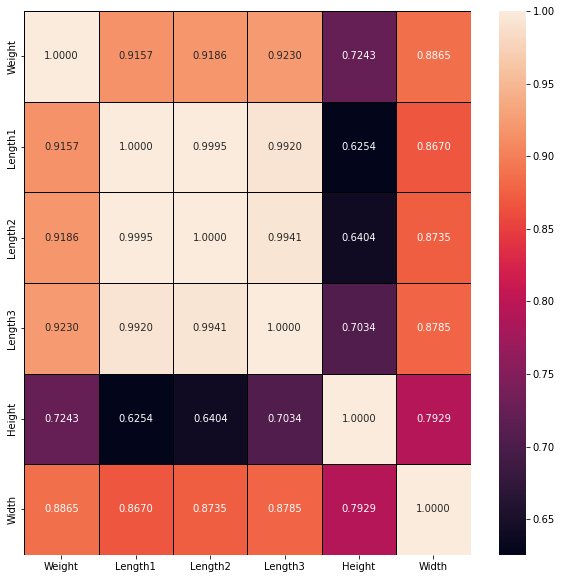

In [6]:
# Visualization of correlation result with seaborn library heatmap.
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(Fishdata.corr(), annot = True, linewidths=0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

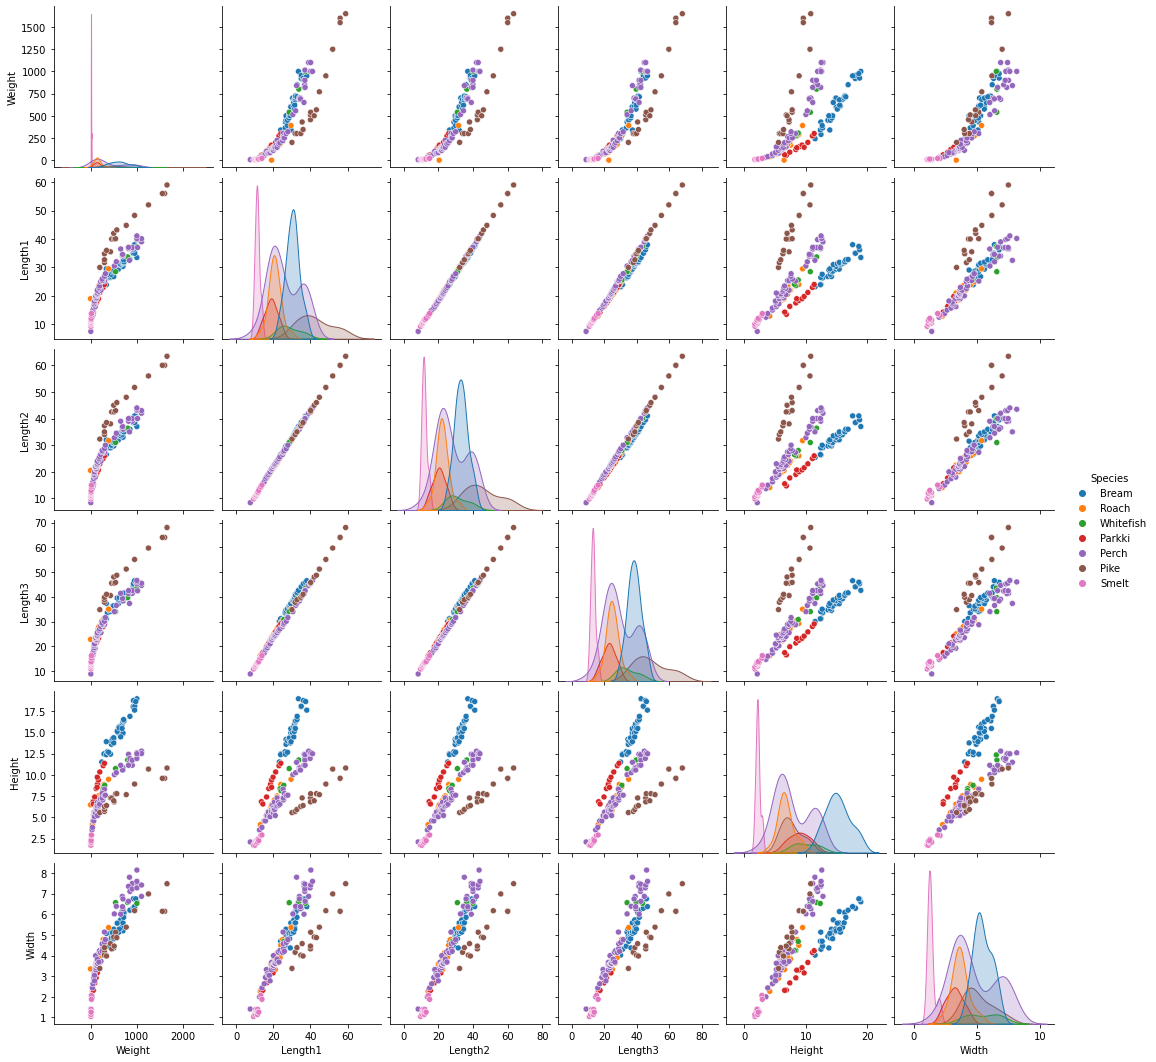

In [7]:
# Visualization of correlation results with seaborn library pairplot
sns.pairplot(Fishdata, hue = "Species")

In [8]:
# Dataset columns names
Fishdata.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

# Pytorch <a id = "2"></a>
[Go Content](#cont) <br>
In this chapter, I will use basic PyTorch codes. After I will prepare the dataset for the Logistic Regression model with Pytorch.

**What Is PyTorch, and How Does It Work?**
<p>PyTorch is an optimized Deep Learning tensor library based on Python and Torch and is mainly used for applications using GPUs and CPUs. PyTorch is favored over other Deep Learning frameworks like TensorFlow and Keras since it uses dynamic computation graphs and is completely Pythonic. It allows scientists, developers, and neural network debuggers to run and test portions of the code in real-time. Thus, users don’t have to wait for the entire code to be implemented to check if a part of the code works or not.</p>

The two main features of PyTorch are: <br>
- Tensor Computation (similar to NumPy) with strong GPU (Graphical Processing Unit) acceleration support
- Automatic Differentiation for creating and training deep neural networks

The more information about the Pytorch, [click here](https://www.simplilearn.com/what-is-pytorch-article)

## Basic of Pytorch <a id ="p1"></a>
[Go Content](#cont)

I import the PyTorch library for the tensor chapter.

In [9]:
import torch

### Tensor <a id = "bof1"></a>
[Go Content](#cont) <br>
Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters. In this chapter, I will apply basic tensor codes of PyTorch.

**Directly from data** 

Tensors can be created directly from data. The data type is automatically inferred.

In [10]:
pydata = [[1, 2],[3, 4]]
x_data = torch.tensor(pydata)
x_data

tensor([[1, 2],
        [3, 4]])

**From a NumPy array**

Tensors can be created from NumPy arrays

In [11]:
np_array = np.array(pydata)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

**From another tensor:**

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.

In [12]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.3275, 0.4821],
        [0.5922, 0.8708]]) 



**With random or constant values:**

shape is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.

In [13]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.6937, 0.8317, 0.4826],
        [0.7007, 0.6337, 0.4779]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


**Attributes of a Tensor**

Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [14]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


**Joining tensors**

I will combine the tensors in the code below.

In [15]:
Jtensor1 = torch.cat([rand_tensor, ones_tensor, zeros_tensor], dim=1)
Jtensor1

tensor([[0.6937, 0.8317, 0.4826, 1.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000],
        [0.7007, 0.6337, 0.4779, 1.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000]])

In [16]:
Jtensor0 = torch.cat([rand_tensor, ones_tensor, zeros_tensor], dim=0)
Jtensor0

tensor([[0.6937, 0.8317, 0.4826],
        [0.7007, 0.6337, 0.4779],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000]])

**Arithmetic operations**

I will arithmetic operations with pytorch.

In [17]:
# Create Tensor
Aotensor = torch.ones(3,3)
Raotensor = torch.rand(3,3)
print("\n", Aotensor)
print("\n", Raotensor)



 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

 tensor([[0.6551, 0.6015, 0.1760],
        [0.3198, 0.5774, 0.0673],
        [0.2129, 0.2339, 0.9413]])


In [18]:
# Resize
print("{}{}\n".format(Aotensor.view(9).shape,Aotensor.view(9)))

# Addition
print("Addition: {}\n".format(torch.add(Aotensor, Raotensor)))

# Subtraction
print("Subtraction: {}\n".format(torch.sub(Aotensor, Raotensor)))

# multiplication
print("multiplication: {}\n".format(torch.mul(Aotensor.add(Aotensor), Raotensor)))

# division
print("division: {}\n".format(torch.div(Aotensor.add(5), Aotensor)))

# Mean, Median
MeanTensor = torch.Tensor([1,2,3,4,5])
print("Mean: {}\n".format(MeanTensor.mean()))
print("Median: {}\n".format(MeanTensor.median()))

# Standart deviation (std)
print("std: {}".format(MeanTensor.std()))

torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Addition: tensor([[1.6551, 1.6015, 1.1760],
        [1.3198, 1.5774, 1.0673],
        [1.2129, 1.2339, 1.9413]])

Subtraction: tensor([[0.3449, 0.3985, 0.8240],
        [0.6802, 0.4226, 0.9327],
        [0.7871, 0.7661, 0.0587]])

multiplication: tensor([[1.3101, 1.2029, 0.3521],
        [0.6396, 1.1548, 0.1346],
        [0.4257, 0.4677, 1.8827]])

division: tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]])

Mean: 3.0

Median: 3.0

std: 1.5811388492584229


**Single-element tensors**

I will collect the elements of tensor.

In [19]:
# Create Tensor
seTensor = torch.ones(3,3)
print("\n", seTensor)

add = seTensor.sum()
add_item = add.item()
print("\n",add_item, type(add_item))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

 9.0 <class 'float'>


The more information about PyTorch, [click here](https://pytorch.org/tutorials/)

## Linear Regression <a id ="p2"></a>
[Go Content](#cont)

**What is the linear regression?** <br>
Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values. There are simple linear regression calculators that use a “least squares” method to discover the best-fit line for a set of paired data. You then estimate the value of X (dependent variable) from Y (independent variable).

If you want the more information about the Linear Regression model, [Click here](https://www.ibm.com/topics/linear-regression)

If you want to look at how to create a Linear Regression model with Sklearn, [Click here](https://www.kaggle.com/code/ihsncnkz/eda-and-linear-regression)

### Preparing Data <a id = "lr1"></a>
[Go Content](#cont) <br>
In this section, I will prepare the dataset for Linear Regression with Pytorch.

In the code below, I determine the x and y variables that I will use for the Linear Regression model from the dataset. When determining the x and y values, I look at the linear relationship between them.

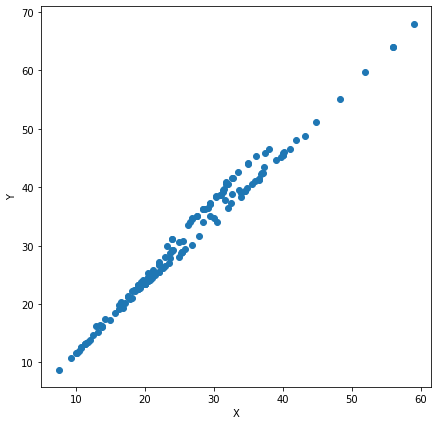

In [20]:
x = Fishdata["Length1"] # x values for PyTorch model
y = Fishdata["Length3"] # y values for PyTorch model
#Graph
plt.figure(figsize=[7,7]) 
plt.scatter(x=x,y=y) 
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [21]:
x

0      23.2
1      24.0
2      23.9
3      26.3
4      26.5
       ... 
154    11.5
155    11.7
156    12.1
157    13.2
158    13.8
Name: Length1, Length: 159, dtype: float64

In [22]:
y

0      30.0
1      31.2
2      31.1
3      33.5
4      34.0
       ... 
154    13.4
155    13.5
156    13.8
157    15.2
158    16.2
Name: Length3, Length: 159, dtype: float64

I will change the NumPy array to tensor format.

In [23]:
from torch.autograd import Variable

# x return tensor from np array
x_np = np.array(list(x), dtype=np.float32)
x_np = x_np.reshape(-1,1)
x_tensor = Variable(torch.from_numpy(x_np)) # changed the NumPy array to tensor format

In [24]:
x_tensor[0:10]

tensor([[23.2000],
        [24.0000],
        [23.9000],
        [26.3000],
        [26.5000],
        [26.8000],
        [26.8000],
        [27.6000],
        [27.6000],
        [28.5000]])

In [25]:
# y return tensor from np array
y_np = np.array(list(y), dtype=np.float32)
y_np = y_np.reshape(-1,1)
y_tensor = Variable(torch.from_numpy(y_np)) # changed the NumPy array to tensor format

In [26]:
y_tensor[0:10]

tensor([[30.0000],
        [31.2000],
        [31.1000],
        [33.5000],
        [34.0000],
        [34.7000],
        [34.5000],
        [35.0000],
        [35.1000],
        [36.2000]])

### Training Data <a id = "lr2"></a>
[Go Content](#cont) <br>
In this chapter, I will prepare the PyTorch model and I will use the linear regression model at the prepared the dataset.

epoch 0, loss 896.3358154296875
epoch 50, loss 38.54497146606445
epoch 100, loss 3.8316152095794678
epoch 150, loss 2.4267220497131348
epoch 200, loss 2.3697543144226074
epoch 250, loss 2.3673319816589355
epoch 300, loss 2.3671176433563232
epoch 350, loss 2.366992712020874
epoch 400, loss 2.3668720722198486
epoch 450, loss 2.3667502403259277
epoch 500, loss 2.366629123687744
epoch 550, loss 2.3665084838867188
epoch 600, loss 2.3663885593414307
epoch 650, loss 2.366267204284668
epoch 700, loss 2.366147518157959
epoch 750, loss 2.366025924682617
epoch 800, loss 2.365906000137329
epoch 850, loss 2.3657844066619873
epoch 900, loss 2.36566424369812
epoch 950, loss 2.365543842315674
epoch 1000, loss 2.365424633026123


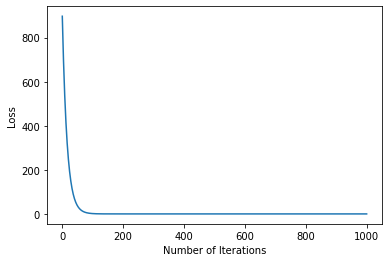

In [27]:
# Import Libraries
from torch.autograd import Variable
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")

# create class 
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        # super function. It inherits from nn.Module and we can access everythink in nn.Module
        super(LinearRegression, self).__init__()
        
        # linear function
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x_tensor):
        return self.linear(x_tensor)

# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

# MSE
mse = nn.MSELoss()

# Optimization (find parameters that minimize error)
learning_rate = 0.00002 # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
    
    # optimization
    optimizer.zero_grad()
    
    # forward to get output
    results = model(x_tensor)
    
    # Calculate loss
    loss = mse(results, y_tensor)
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

I will visualize x and y values with predicted values.

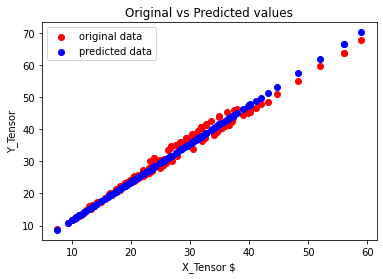

In [28]:
# predict our car price
predicted = model(x_tensor).data.numpy()
plt.scatter(x_tensor, y_tensor, label = "original data", color = "red")
plt.scatter(x_tensor, predicted, label = "predicted data", color = "blue")

# predict if car price is 10$, what will be the number of car sell
#predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()
#plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("X_Tensor $")
plt.ylabel("Y_Tensor")
plt.title("Original vs Predicted values")
plt.show()

# CONCLUSION <a id ="3"></a>
****
[Go Content](#cont) <br>
I am learning the English language newly if I make an errata please advise me in the comment. Thank you for reading my notebook, your votes and your comments. I will be waiting for your advice.